### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent Variable: The words conditions (congruent or incongruent)

Dependent Variable:  The time it takes to name the ink colors in equally-sized lists.



---

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothesis: It takes same time for the subjects to name the ink colors in both of the congruent and incongruent words condition.

Alternative Hypothesis: It takes significant different time for the subjects to name the ink colors in the congruent words condition, compared with in the incongruent condition.

$H_{0}$: $t_{congruent}$ = $t_{incongruent}$

$H_{1}$: $t_{congruent}$ <> $t_{incongruent}$


A bootstrapping test is used to see if there is any differences between the time used for color-naming under the two conditions.

---

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [4]:
df.shape

(24, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


(array([2., 2., 1., 1., 5., 0., 4., 2., 3., 0., 2., 1., 0., 0., 1.]),
 array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]),
 <a list of 15 Patch objects>)

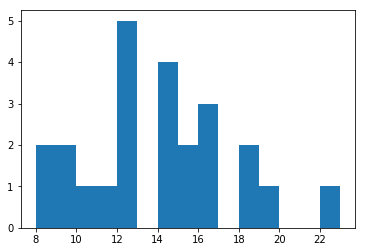

In [21]:
plt.hist(df['Congruent'], bins= list(range(8,24)),rwidth=1)

**In the Congruent condition, the average response time of naming ink color is 14.051125 ms, with a standard diviation of 3.559358.**

**The quickest response took 8.630000 ms, while the slowest used 22.328000 ms.**

**It is a right skewed distribution. The mode falls between 12 and 13, which is 5 people.**

(array([1., 0., 4., 2., 1., 4., 2., 3., 1., 2., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 1.]),
 array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36]),
 <a list of 21 Patch objects>)

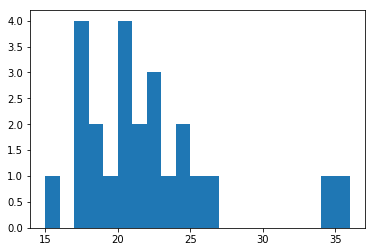

In [25]:
plt.hist(df['Incongruent'],bins= list(range(15,37)),rwidth=1)

**In the incongruent condition, the average response time of naming ink color is 22.015917 ms, with a standard diviation of 4.797057.**

**The quickest response took 15.687000 ms, while the slowest used 35.255000 ms.**

**It is a bimodal distribution. One mode is in 17-18, and the other in 20-21,  which consists of 4 people.**

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [26]:
# see answer above

--write answer here--

(5)  Now, perform the statistical test and report your results. 

What is your **confidence level** or Type I error associated with your test? 

What is your **conclusion** regarding the hypotheses you set up? 

Did the results match up with your **expectations**? 

**Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

$H_{0}$: $t_{incongruent}$ = $t_{congruent}$

$H_{1}$: $t_{incongruent}$ <> $t_{congruent}$

In [32]:
cgrt = df['Congruent'].mean()
incgrt = df['Incongruent'].mean()
diff = incgrt - cgrt
diff

7.964791666666665

In [38]:
diffs = []

for _ in np.arange(100000):
    bootsample = df.sample(df.shape[0], replace=True)
    cgrt = bootsample['Congruent'].mean()
    incgrt = bootsample['Incongruent'].mean()
    diffs.append(incgrt - cgrt)

(array([9.4000e+01, 1.7310e+03, 1.0963e+04, 2.6823e+04, 3.1678e+04,
        1.9843e+04, 7.0880e+03, 1.5380e+03, 2.2300e+02, 1.9000e+01]),
 array([ 4.43004167,  5.24220417,  6.05436667,  6.86652917,  7.67869167,
         8.49085417,  9.30301667, 10.11517917, 10.92734167, 11.73950417,
        12.55166667]),
 <a list of 10 Patch objects>)

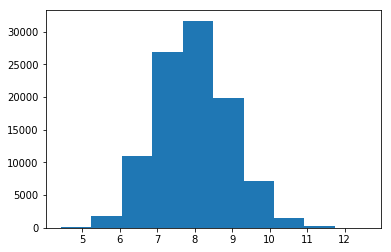

In [41]:
diffs = np.array(diffs)
plt.hist(diffs)

In [42]:
null_values = np.random.normal(0, diffs.std(), diffs.size)


In [46]:
low, high = np.percentile(null_values, 2.5), np.percentile(null_values, 97.5)
low, high

(-1.9130500811035736, 1.9088456261013171)

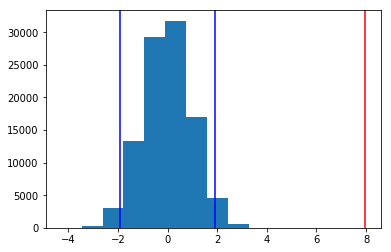

In [47]:
plt.hist(null_values)
plt.axvline(x=diff, color='r')
plt.axvline(x=low, color='b')
plt.axvline(x=high, color = 'b')

In [48]:
(null_values - diff > 0).mean()

0.0

**There is a significant difference between the response time in the two conditions (P = 0.0 < 0.05)**

---

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? 
Some research about the problem will be helpful for thinking about these two questions!

The cause is the conflict between the words' real color and meaning. 

Another example: 

Incongruent: The subjects should say 'square' when they see a circle, and say 'circle' when seeing a square.

Congruent: The subjects should say 'square' when they see a square, and say 'circle' when seeing a circle.